In [2]:
import pandas as pd
import datetime as dt

### Groupby()

https://teddylee777.github.io/pandas/pandas-groupby/

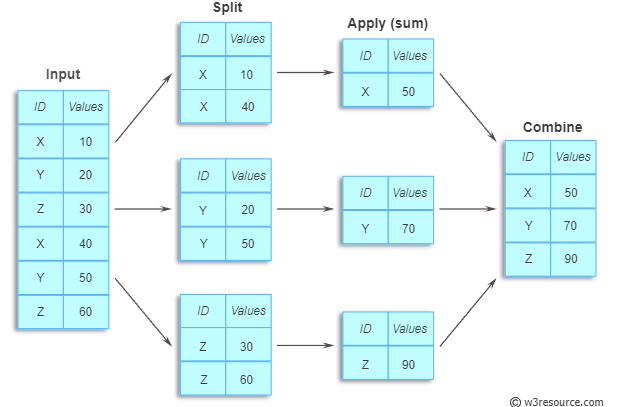

In [194]:
from IPython.display import Image
Image("groupby.PNG")

groupby().agg()
- count
- sum
- mean, median
- var, std
- min, max
- unique, nunique
- prod (곱)
- first, last

In [ ]:
# 다중 통계 적용
df.groupby('sex').agg(['mean', 'var'])

# 컬럼별 다른 통계량 산출
df.groupby('sex').agg({'total_bill': 'mean', 
                       'tip': ['sum', 'var'],
                       'size': 'median'
                      })

# 사용자정의 함수
df.groupby('sex')[['total_bill', 'tip']].agg(lambda x: x.mean() / x.std())

# as_index=False로 하여 기존 인덱스의 유지
df.groupby(['index'],as_index=False).sum()

## 킹카운티 주거지 가격예측문제 데이터

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice//train.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8961990160,20150413T000000,567500.0,3,2.5,2080,4556,2.0,0,0,...,8,2080,0,1999,0,98074,47.6036,-122.014,1530,5606
1,9455200205,20140604T000000,525000.0,3,2.0,1540,7800,1.0,0,0,...,8,1540,0,2004,0,98125,47.7041,-122.288,1510,7800
2,7853220670,20140918T000000,540000.0,3,2.5,2860,8935,2.0,0,0,...,8,2860,0,2004,0,98065,47.5336,-121.855,2650,6167
3,3298201170,20141110T000000,350000.0,3,1.0,940,7811,1.0,0,0,...,6,940,0,1959,0,98008,47.6195,-122.118,1180,7490
4,7972604355,20140521T000000,218000.0,3,1.0,1020,7874,1.0,0,0,...,7,1020,0,1956,0,98106,47.5175,-122.346,1290,7320


Q95. bedrooms 의 빈도가 가장 높은 값을 가지는 데이터들의 price의 상위 10%와 하위 10%값의 차이를 구하여라

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long  

In [33]:
df[df.bedrooms == df.bedrooms.value_counts().reset_index().iloc[0][0]].price.quantile(0.9) - df[df.bedrooms == df.bedrooms.value_counts().reset_index().iloc[0][0]].price.quantile(0.1)

505500.0

## 대학원 입학가능성 데이터

In [75]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/admission/train.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,246,328,110,4,4.0,2.5,9.02,1,0.81
1,100,323,113,3,4.0,4.0,8.88,1,0.79
2,79,296,95,2,3.0,2.0,7.54,1,0.44
3,53,334,116,4,4.0,3.0,8.00,1,0.78
4,444,321,114,5,4.5,4.5,9.16,1,0.87


Q96. Serial No. 컬럼을 제외하고 ‘Chance of Admit’을 종속변수, 나머지 변수를 독립변수라 할때, 랜덤포레스트를 통해 회귀 예측을 할 떄 변수중요도 값을 출력하라 (시드값에 따라 순서는 달라질수 있음)

In [70]:
y = df.pop('Chance of Admit')
x = df.drop(["Serial No."],axis =1)

In [71]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,328,110,4,4.0,2.5,9.02,1
1,323,113,3,4.0,4.0,8.88,1
2,296,95,2,3.0,2.0,7.54,1
3,334,116,4,4.0,3.0,8.00,1
4,321,114,5,4.5,4.5,9.16,1
...,...,...,...,...,...,...,...
395,329,114,5,4.0,5.0,9.30,1
396,307,109,3,4.0,3.0,8.00,1
397,298,98,2,1.5,2.5,7.50,1
398,339,116,4,4.0,3.5,9.80,1


In [72]:
y

0      0.81
1      0.79
2      0.44
3      0.78
4      0.87
       ... 
395    0.86
396    0.62
397    0.44
398    0.96
399    0.86
Name: Chance of Admit, Length: 400, dtype: float64

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
rf = RandomForestRegressor()
rf.fit(x, y)
pd.DataFrame(rf.feature_importances_, x.columns,).sort_values(0,ascending = False)

,0
CGPA,0.811479
GRE Score,0.086419
TOEFL Score,0.030362
SOP,0.025701
LOR,0.024444
University Rating,0.013524
Research,0.008070


In [80]:
df_t = df.drop([df.columns[0]],axis=1)
x1 = df_t.drop([df.columns[-1]],axis=1)
y1 = df_t[df.columns[-1]]

In [81]:
ml = RandomForestRegressor()

ml.fit(x1,y1)

result=pd.DataFrame({'importance':ml.feature_importances_},x.columns).sort_values('importance',ascending=False)
display(result)

,importance
CGPA,0.816028
GRE Score,0.077702
TOEFL Score,0.035373
LOR,0.026235
SOP,0.023683
University Rating,0.013260
Research,0.007719


## 레드 와인 퀄리티 예측 데이터

In [84]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/redwine/train.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6
1,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
2,7.1,0.36,0.30,1.6,0.080,35.0,70.0,0.99693,3.44,0.50,9.4,5
3,7.6,0.29,0.49,2.7,0.092,25.0,60.0,0.99710,3.31,0.61,10.1,6
4,7.7,0.51,0.28,2.1,0.087,23.0,54.0,0.99800,3.42,0.74,9.2,5


Q97. quality 값이 3인 그룹과 8인 데이터그룹의 각 컬럼별 독립변수의 표준편차 값의 차이를 구할때 그값이 가장 큰 컬럼명을 구하여라

In [96]:
abs((df[df.quality == 3].std() - df[df.quality == 8].std())).sort_values().reset_index().iloc[-1]['index']

'total sulfur dioxide'

In [99]:
abs((df[df.quality == 3].std() - df[df.quality == 8].std())).sort_values().index[-1]

'total sulfur dioxide'

## 약물 분류 데이터

In [104]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/train.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,20,F,NORMAL,NORMAL,9.281,4
1,24,M,HIGH,NORMAL,9.475,1
2,34,M,NORMAL,HIGH,22.456,0
3,17,M,NORMAL,NORMAL,10.832,4
4,72,M,LOW,HIGH,16.310,0


Q98. 남성들의 연령대별 (10살씩 구분 0~9세 10~19세 …) Na_to_K값의 평균값을 구해서 데이터 프레임으로 표현하여라

In [105]:
df['연령대'] = df.Age // 10 * 10

In [108]:
df[df.Sex == 'M'].groupby("연령대")['Na_to_K'].mean().to_frame()

,Na_to_K
연령대,
10,13.627000
20,18.260769
30,15.244143
40,13.897273
50,14.811273
60,14.284308
70,11.363857


## 사기회사 분류 데이터

In [109]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/audit/train.csv")
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,2.72,14,4.53,0.6,2.718,87.93,0.6,52.758,92.46,5.0,...,0.4,0,0.2,0.0,4.0,108.362,0.4,0.5,21.6724,1
1,3.41,16,12.68,0.6,7.608,41.00,0.6,24.600,53.68,5.5,...,0.4,0,0.2,0.0,4.4,41.936,0.4,0.5,8.3872,1
2,2.72,11,3.11,0.6,1.866,113.97,0.6,68.382,117.08,5.5,...,0.4,0,0.2,0.0,4.4,88.832,0.4,0.5,17.7664,1
3,3.41,8,1.12,0.4,0.448,0.00,0.2,0.000,1.12,5.0,...,0.4,0,0.2,0.0,2.2,1.848,0.4,0.5,0.3696,0
4,55.57,9,1.06,0.4,0.424,0.00,0.2,0.000,1.06,5.0,...,0.4,0,0.2,0.0,2.2,1.824,0.4,0.5,0.3648,0


Q99. 데이터의 Risk 값에 따른 score_a와 score_b의 평균값을 구하여라

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    620 non-null    float64
 1   LOCATION_ID     620 non-null    object 
 2   PARA_A          620 non-null    float64
 3   Score_A         620 non-null    float64
 4   Risk_A          620 non-null    float64
 5   PARA_B          620 non-null    float64
 6   Score_B         620 non-null    float64
 7   Risk_B          620 non-null    float64
 8   TOTAL           620 non-null    float64
 9   numbers         620 non-null    float64
 10  Score_B.1       620 non-null    float64
 11  Risk_C          620 non-null    float64
 12  Money_Value     619 non-null    float64
 13  Score_MV        620 non-null    float64
 14  Risk_D          620 non-null    float64
 15  District_Loss   620 non-null    int64  
 16  PROB            620 non-null    float64
 17  RiSk_E          620 non-null    flo

In [111]:
df.Risk.unique()

array([1, 0], dtype=int64)

In [112]:
df.groupby("Risk")[['Score_A','Score_B']].mean()

,Score_A,Score_B
Risk,,
0,0.262234,0.225532
1,0.490164,0.444262


## 센서데이터 동작유형 분류 데이터

In [113]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/muscle/train.csv")
df.head()

,motion_0,motion_1,motion_2,motion_3,motion_4,motion_5,motion_6,motion_7,motion_8,motion_9,...,motion_55,motion_56,motion_57,motion_58,motion_59,motion_60,motion_61,motion_62,motion_63,pose
0,-6.0,8.0,5.0,6.0,-12.0,-27.0,5.0,24.0,-8.0,-5.0,...,-1.0,-3.0,-6.0,-9.0,-7.0,36.0,68.0,3.0,-3.0,1
1,-32.0,-3.0,-4.0,-5.0,-1.0,16.0,0.0,-5.0,42.0,2.0,...,-17.0,-12.0,-1.0,-1.0,0.0,-26.0,-11.0,-4.0,-9.0,1
2,35.0,-2.0,-1.0,1.0,-25.0,-16.0,-3.0,-20.0,10.0,1.0,...,6.0,-65.0,6.0,-10.0,-31.0,-19.0,-3.0,-47.0,-17.0,0
3,-15.0,-6.0,-3.0,-5.0,27.0,37.0,-2.0,-2.0,19.0,5.0,...,2.0,11.0,0.0,-2.0,-4.0,-7.0,15.0,3.0,14.0,1
4,60.0,3.0,0.0,-7.0,-6.0,-10.0,-6.0,7.0,-11.0,-4.0,...,-12.0,17.0,-3.0,1.0,2.0,-2.0,20.0,18.0,10.0,0


Q100. pose값에 따른 각 motion컬럼의 중간값의 가장 큰 차이를 보이는 motion컬럼은 어디이며 그값은?

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   motion_0   4650 non-null   float64
 1   motion_1   4650 non-null   float64
 2   motion_2   4650 non-null   float64
 3   motion_3   4650 non-null   float64
 4   motion_4   4650 non-null   float64
 5   motion_5   4650 non-null   float64
 6   motion_6   4650 non-null   float64
 7   motion_7   4650 non-null   float64
 8   motion_8   4650 non-null   float64
 9   motion_9   4650 non-null   float64
 10  motion_10  4650 non-null   float64
 11  motion_11  4650 non-null   float64
 12  motion_12  4650 non-null   float64
 13  motion_13  4650 non-null   float64
 14  motion_14  4650 non-null   float64
 15  motion_15  4650 non-null   float64
 16  motion_16  4650 non-null   float64
 17  motion_17  4650 non-null   float64
 18  motion_18  4650 non-null   float64
 19  motion_19  4650 non-null   float64
 20  motion_2

In [115]:
df.pose.unique()

array([1, 0], dtype=int64)

In [132]:
t = df.groupby('pose').median().T
t.head(3)

pose,0,1
motion_0,-2.0,-2.0
motion_1,-1.0,-1.0
motion_2,-1.0,-1.0


In [135]:
abs( t.iloc[:,0] - t.iloc[:,1] ).sort_values().index[-1]

'motion_62'

## 현대 차량 가격 분류문제 데이터

In [137]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/train.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,Tucson,2016,12795,Manual,36263,Diesel,30,61.7,1.7
1,I10,2012,3995,Manual,22089,Petrol,20,61.4,1.2
2,I30,2019,24000,Manual,555,Petrol,145,34.0,2.0
3,Tucson,2017,12995,Manual,32147,Diesel,30,61.7,1.7
4,Tucson,2018,14991,Semi-Auto,32217,Diesel,150,57.6,1.7


Q101. 정보(row수)가 가장 많은 상위 3차종의 price값의 각 평균값은?

In [143]:
df.model.value_counts().index[0:3]

Index([' Tucson', ' I10', ' I30'], dtype='object')

In [150]:
df[df.model.isin(df.model.value_counts().index[0:3])].groupby('model').mean()['price'].to_frame()

,price
model,
I10,7646.137891
I30,11651.821759
Tucson,15805.441373


## 당뇨여부판단 데이터

In [151]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/train.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,102,74,0,0,29.5,0.121,32,0
1,2,144,58,33,135,31.6,0.422,25,1
2,5,136,82,0,0,0.0,0.640,69,0
3,13,145,82,19,110,22.2,0.245,57,0
4,1,117,60,23,106,33.8,0.466,27,0


## Q102. Outcome 값에 따른 각 그룹의 각 컬럼의 평균 차이를 구하여라

In [154]:
d = df.groupby('Outcome').mean().T
d[1] - d[0]

Pregnancies                  1.574159
Glucose                     29.943995
BloodPressure                3.202079
SkinThickness                2.952033
Insulin                     33.398645
BMI                          4.541437
DiabetesPedigreeFunction     0.143646
Age                          5.866939
dtype: float64

In [157]:
df.groupby('Outcome').mean().diff().iloc[1,:]

Pregnancies                  1.574159
Glucose                     29.943995
BloodPressure                3.202079
SkinThickness                2.952033
Insulin                     33.398645
BMI                          4.541437
DiabetesPedigreeFunction     0.143646
Age                          5.866939
Name: 1, dtype: float64

## 넷플릭스 주식 데이터

In [158]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/nflx/NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


## Q103. 매년 5월달의 open가격의 평균값을 데이터 프레임으로 표현하라

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4874 non-null   object 
 1   Open       4874 non-null   float64
 2   High       4874 non-null   float64
 3   Low        4874 non-null   float64
 4   Close      4874 non-null   float64
 5   Adj Close  4874 non-null   float64
 6   Volume     4874 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 266.7+ KB


In [160]:
df.Date = pd.to_datetime(df.Date)
df.Date.min(), df.Date.max()

(Timestamp('2002-05-23 00:00:00'), Timestamp('2021-09-30 00:00:00'))

In [161]:
import datetime as dt

In [163]:
df[df.Date.dt.month == 5].groupby(df.Date.dt.year).mean().Open

Date
2002      1.155833
2003      1.641497
2004      4.261143
2005      1.951905
2006      4.163571
2007      3.159351
2008      4.435034
2009      5.790571
2010     14.417071
2011     34.650272
2012     10.523247
2013     31.936429
2014     51.121292
2015     85.057429
2016     92.705715
2017    158.255455
2018    329.779541
2019    359.664548
2020    433.880499
2021    496.923996
Name: Open, dtype: float64

In [164]:
df.Date.dt.strftime("%Y-%m")

0       2002-05
1       2002-05
2       2002-05
3       2002-05
4       2002-05
         ...   
4869    2021-09
4870    2021-09
4871    2021-09
4872    2021-09
4873    2021-09
Name: Date, Length: 4874, dtype: object

In [171]:
t = df.groupby(df.Date.dt.strftime("%Y-%m")).mean()
t.loc[t.index.str.contains('-05')].Open

Date
2002-05      1.155833
2003-05      1.641497
2004-05      4.261143
2005-05      1.951905
2006-05      4.163571
2007-05      3.159351
2008-05      4.435034
2009-05      5.790571
2010-05     14.417071
2011-05     34.650272
2012-05     10.523247
2013-05     31.936429
2014-05     51.121292
2015-05     85.057429
2016-05     92.705715
2017-05    158.255455
2018-05    329.779541
2019-05    359.664548
2020-05    433.880499
2021-05    496.923996
Name: Open, dtype: float64

## nba 선수 능력치 데이터

In [172]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/nba/nba.csv",encoding='latin',sep=';')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


Q104. Tm 컬럼은 각 팀의 이름을 의미한다. TOR팀의 평균나이를 소수 4째 자리까지 구하여라

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      812 non-null    int64  
 1   Player  812 non-null    object 
 2   Pos     812 non-null    object 
 3   Age     812 non-null    int64  
 4   Tm      812 non-null    object 
 5   G       812 non-null    int64  
 6   GS      812 non-null    int64  
 7   MP      812 non-null    float64
 8   FG      812 non-null    float64
 9   FGA     812 non-null    float64
 10  FG%     812 non-null    float64
 11  3P      812 non-null    float64
 12  3PA     812 non-null    float64
 13  3P%     812 non-null    float64
 14  2P      812 non-null    float64
 15  2PA     812 non-null    float64
 16  2P%     812 non-null    float64
 17  eFG%    812 non-null    float64
 18  FT      812 non-null    float64
 19  FTA     812 non-null    float64
 20  FT%     812 non-null    float64
 21  ORB     812 non-null    float64
 22  DR

In [174]:
round(df[df.Tm == 'TOR'].Age.mean(),4)

24.8696

Q105. Pos 컬럼은 포지션을 의미한다. 전체 선수 중 최소나이대의 선수들을 필터하고 그들 중 가장 많은 포지션은 무엇인지 확인하라

In [180]:
df[df.Age == df.Age.min()].Pos.value_counts().index[0]

'SG'

## Q106. 선수들의 이름은 first_name+ 공백 + last_name으로 이루어져 있다. 가장 많은 first_name은 무엇이며 몇 회 발생하는지 확인하라

In [186]:
lst = []
for i in range(len(df.Player)):
     lst.append(df.Player.str.split(' ')[i][0])

In [223]:
pd.DataFrame(lst).groupby(0).size().sort_values().tail(1)

0
Justin    14
dtype: int64

In [222]:
df.Player.str.split().str[0].str.lower().value_counts().head(1)

justin    14
Name: Player, dtype: int64

Q107. PTS컬럼은 경기당 평균득점수 이다. 각포지션별로 경기당 평균득점수의 평균을 구하여라

In [225]:
df.groupby("Pos").mean().PTS

Pos
C         7.690769
C-PF     12.850000
PF        7.737500
PF-SF     8.500000
PG        8.325161
PG-SG    22.000000
SF        7.270253
SF-SG     8.660000
SG        7.810553
SG-PG     9.525000
SG-SF     7.360000
Name: PTS, dtype: float64

Q108. PTS컬럼은 경기당 평균득점수 이다. 각포지션별로 경기당 평균득점수의 평균을 구하여라

In [ ]:
= 107

Q109. G컬럼은 참여한 경기의 숫자이다. 각 팀별로 가장 높은 경기참여 수를 가진 선수들의 경기 참여 숫자의 평균을 구하여라

In [235]:
df.groupby('Tm').max().G.mean()

77.51612903225806

Q110. Tm의 값이 MIA이며 Pos는 C또는 PF인 선수의 MP값의 평균은?

In [243]:
df[(df.Tm == 'MIA') & (df.Pos.isin(['C','PF']))].MP.mean()

16.7875

Q111. 전체 데이터중 G의 평균값의 1.5배 이상인 데이터들만 추출했을때 3P값의 평균은?

In [248]:
df[df.G >= df.G.mean()*1.5]['3P'].mean()

1.3853658536585365

Q112. Age의 평균 이상인 그룹과 평균 미만인 그룹간의 G값의 평균의 차이는?

In [249]:
df[df.Age >= df.Age.mean()].G.mean() - df[df.Age < df.Age.mean()].G.mean()

3.787674551781862

Q113. 평균나이가 가장 젊은 팀은 어디인가

In [254]:
df.groupby('Tm').mean().Age.sort_values().index[0]

'MEM'

Q114. Pos그룹별 평균 MP값을 구하여라

In [255]:
df.groupby("Pos").mean().MP

Pos
C        16.990000
C-PF     25.350000
PF       17.937500
PF-SF    27.300000
PG       19.547742
PG-SG    37.200000
SF       17.514557
SF-SG    20.340000
SG       18.554271
SG-PG    22.950000
SG-SF    19.620000
Name: MP, dtype: float64